## Plot approximation errors of solutions for the SDOF problem

In [1]:
import sys
sys.path.append('../')

import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('classic')


import time

from functions.BernsteinPols import BP, dBP
from functions.construct_B import construct_B
from functions.iteration import SDOF_integration
from functions.make_solution import get_displacement, get_speed, get_acceleration, get_solution

Define parameters for the SDOF system

In [2]:
m   = 1                 # the mass, >0
c   = 0                 # the damping coefficient, >= 0
k   = 1                 # the stiffness coefficient, >0
x0  = 0                 # the initial displacement
dx0 = 0                 # the initial speed
def force(t):           # the excitation function
	return np.sin(t)

Provide exact solution

In [3]:
from functions.solutions import sin_exc_fun as exact

def sol(t):
    return exact(t)

def exact_disp(t):
    return sol(t)[0]

def exact_speed(t):
    return sol(t)[1]

def exact_acc(t):
    return sol(t)[2]

Define parameters for the approximation

In [7]:
p   = 3                 # p-1 is the degree of polynomial approximation, p>= 3
h   = 0.1               # the timestep, >0
l   = 100               # the number of iterations, >0

Initialize and run the algorithm

In [8]:
t0 = time.time()
c = c/m
k = k/m
def f(t):
    return force(t)/m

sdof_int = SDOF_integration(p, c, k, x0, dx0, f, h, l)
t_init = time.time()
BP_coefs = sdof_int.integrator()
t_series, approx_disp, approx_speed, approx_acc = get_solution(BP_coefs, c, k, f, h)
t_solve = time.time() - t_init

In [6]:
print("Initialization took {i:.2e} sec, and execution took {e:.2e} sec".format(i = t_init-t0, e = t_solve))

Initialization took 8.80e-01 sec, and execution took 2.27e-02 sec


Calculate and plot the error of approximation in displacement

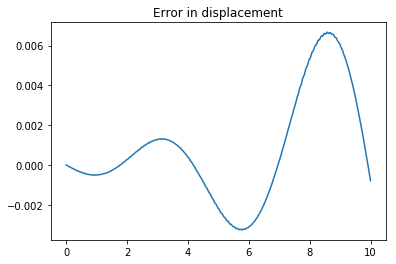

In [10]:
error_disp = exact_disp(t_series) - approx_disp

fig = plt.figure()
ax = plt.axes()
plt.title("Error in displacement")
ax.plot(t_series, error_disp);
plt.show()

Calculate and plot the error of approximation in speed

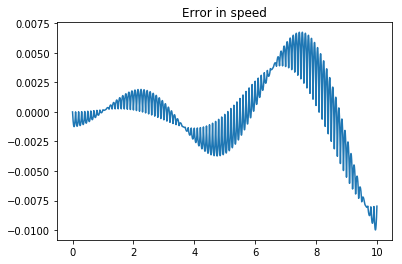

In [11]:
error_speed = exact_speed(t_series) - approx_speed

fig = plt.figure()
ax = plt.axes()
plt.title("Error in speed")
ax.plot(t_series, error_speed);
plt.show()

Calculate and plot the error of approximation in acceleration

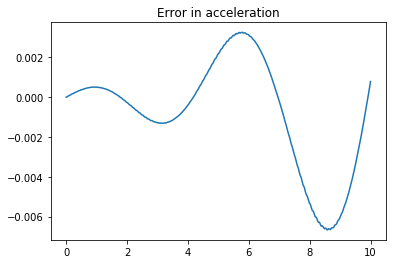

In [12]:
error_acc = exact_acc(t_series) - approx_acc

fig = plt.figure()
ax = plt.axes()
plt.title("Error in acceleration")
ax.plot(t_series, error_acc);
plt.show()